<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/MallcProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1272]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Mall_Customers.csv"

Mall_c = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path)

print(Mall_c.head())

<ipython-input-1272-f94d31986fc5>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  Mall_c = kagglehub.load_dataset(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [1273]:
Mall_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [1274]:
Mall_c.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [1275]:
#drop Customer ID column (not useful)

Mall_c=Mall_c.drop(['CustomerID'],axis=1)
print(Mall_c.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [1276]:
#Applied Ordinal Encoder to the gender column

from sklearn.preprocessing import OrdinalEncoder

gender_encoder = OrdinalEncoder()
Mall_c[['Gender']] = gender_encoder.fit_transform(Mall_c[['Gender']])

print(Mall_c.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0     1.0   19                  15                      39
1     1.0   21                  15                      81
2     0.0   20                  16                       6
3     0.0   23                  16                      77
4     0.0   31                  17                      40


In [1277]:
#feature engineering create new feature (difference between income and spending )
#their usefulness : gives an idea of financial balance of a person

Mall_c['diff_income_spending'] = Mall_c['Annual Income (k$)'] - Mall_c['Spending Score (1-100)']
print(Mall_c)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0       1.0   19                  15                      39   
1       1.0   21                  15                      81   
2       0.0   20                  16                       6   
3       0.0   23                  16                      77   
4       0.0   31                  17                      40   
..      ...  ...                 ...                     ...   
195     0.0   35                 120                      79   
196     0.0   45                 126                      28   
197     1.0   32                 126                      74   
198     1.0   32                 137                      18   
199     1.0   30                 137                      83   

     diff_income_spending  
0                     -24  
1                     -66  
2                      10  
3                     -61  
4                     -23  
..                    ...  
195                    41  
196    

In [1278]:
#applied a stander scaler to the data

from sklearn.preprocessing import StandardScaler
import pandas as pd

columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age','diff_income_spending']
Mall_c_scale = Mall_c[columns]
Mall_c_gender = Mall_c[['Gender']]

scaler = StandardScaler()
Mall_data = scaler.fit_transform(Mall_c_scale)
scaled_df = pd.DataFrame(Mall_data,columns=columns)

Mall_data = pd.concat([Mall_c_gender.reset_index(drop=True), scaled_df], axis=1)
print(Mall_data.head())

   Gender  Annual Income (k$)  Spending Score (1-100)       Age  \
0     1.0           -1.738999               -0.434801 -1.424569   
1     1.0           -1.738999                1.195704 -1.281035   
2     0.0           -1.700830               -1.715913 -1.352802   
3     0.0           -1.700830                1.040418 -1.137502   
4     0.0           -1.662660               -0.395980 -0.563369   

   diff_income_spending  
0             -0.939858  
1             -2.088694  
2             -0.009847  
3             -1.951928  
4             -0.912504  


# PCA Part

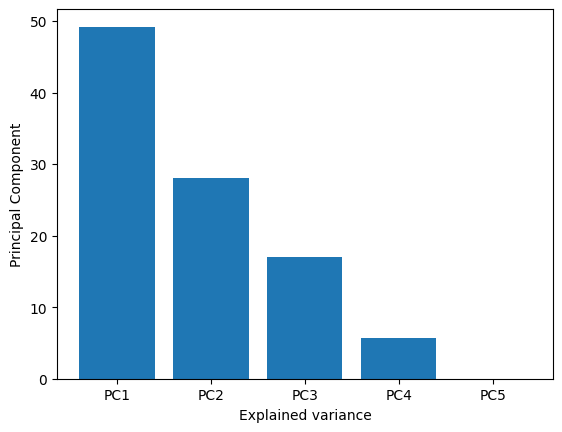

In [1279]:
#applied PCA on  datasets and Analyze explained variance

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
PCA_Mall = pca.fit_transform(Mall_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1) , height=per_var, tick_label=labels)
plt.xlabel('Explained variance')
plt.ylabel('Principal Component')
plt.show()

In [1280]:
#number of components preserving 90–95% variance

condition = (cumulative_variance >= 0.90) & (cumulative_variance<= 0.95)
n_components = np.argmax(condition)

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(Mall_data)

the minimum number of components preserving 90–95% variance: 2


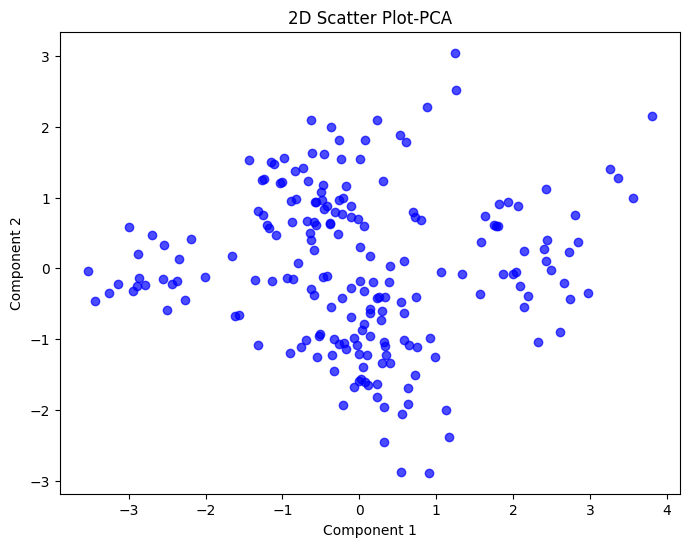

In [1281]:
#Visualize reduced space (2D scatter plots)

import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], alpha=0.7, c='blue')
plt.title('2D Scatter Plot-PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# **T-SNE Part**

In [1282]:
#Applied T-SNE on dataset

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)

TSNE_Mall = tsne.fit_transform(Mall_data)

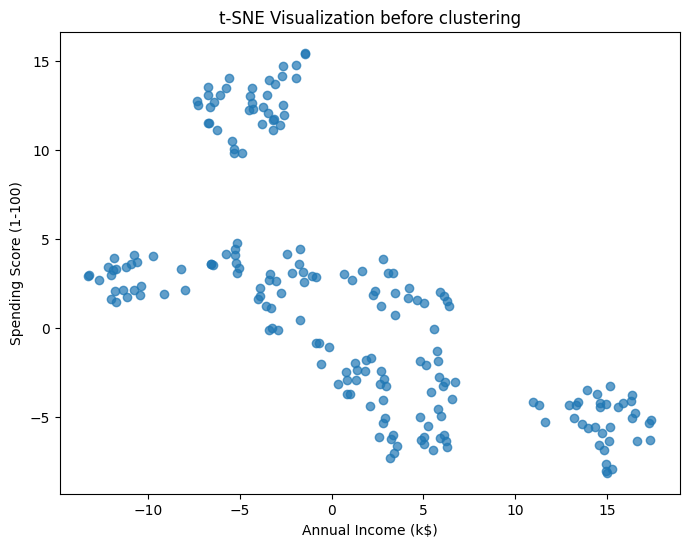

In [1283]:
#2D t-SNE plots before clustering

import matplotlib.pyplot as plt
TSNE_df = pd.DataFrame(TSNE_Mall, columns=['Annual Income (k$)', 'Spending Score (1-100)'])


plt.figure(figsize=(8,6))
plt.scatter(TSNE_df['Annual Income (k$)'], TSNE_df['Spending Score (1-100)'], alpha=0.7)
plt.title('t-SNE Visualization before clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

# **K-Means Clustering**

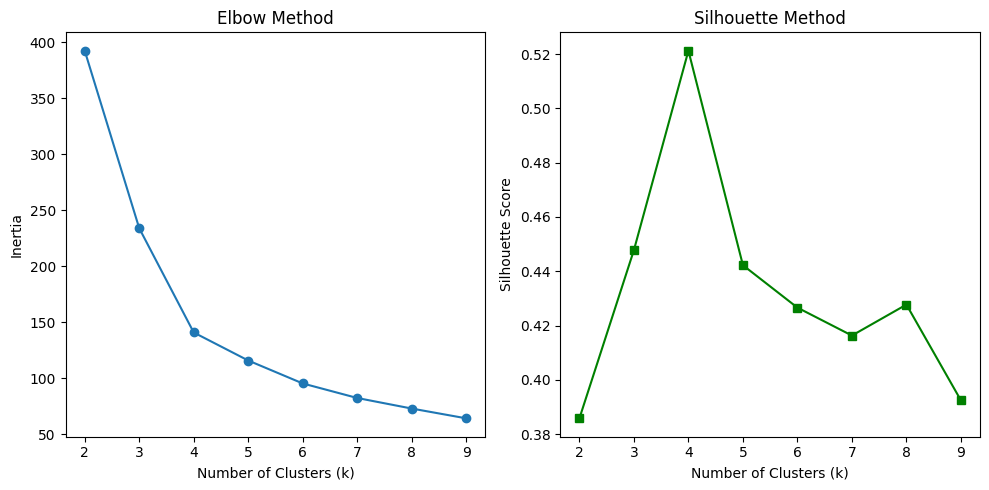

In [1284]:
#Elbow curves and Silhouette score plots

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

inertias=[]
silhouette_scores=[]
k_range=range(2,10)
for k in k_range:
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(x_pca_reduced)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(x_pca_reduced,kmeans.labels_))
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')


plt.subplot(1,2,2)
plt.plot(k_range,silhouette_scores,marker='s',color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

In [1285]:
#

from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(Mall_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


print(inertias)

[849.2799999999995, 584.1245207993252, 414.95220501380606, 313.9731188655859, 250.95018076162214, 216.11108764177044, 200.8687961759306, 181.89197532896478, 168.42015362582256]


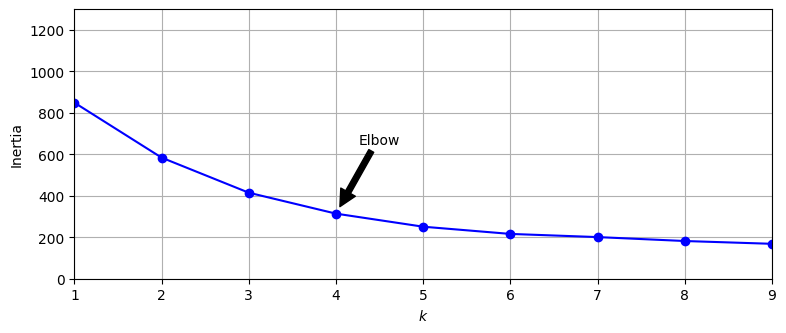

In [1286]:
# Elbow method to determine best k and Inertia

plt.figure(figsize=(9, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")

plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()

plt.axis([1, 9, 0, 1300])
plt.show()

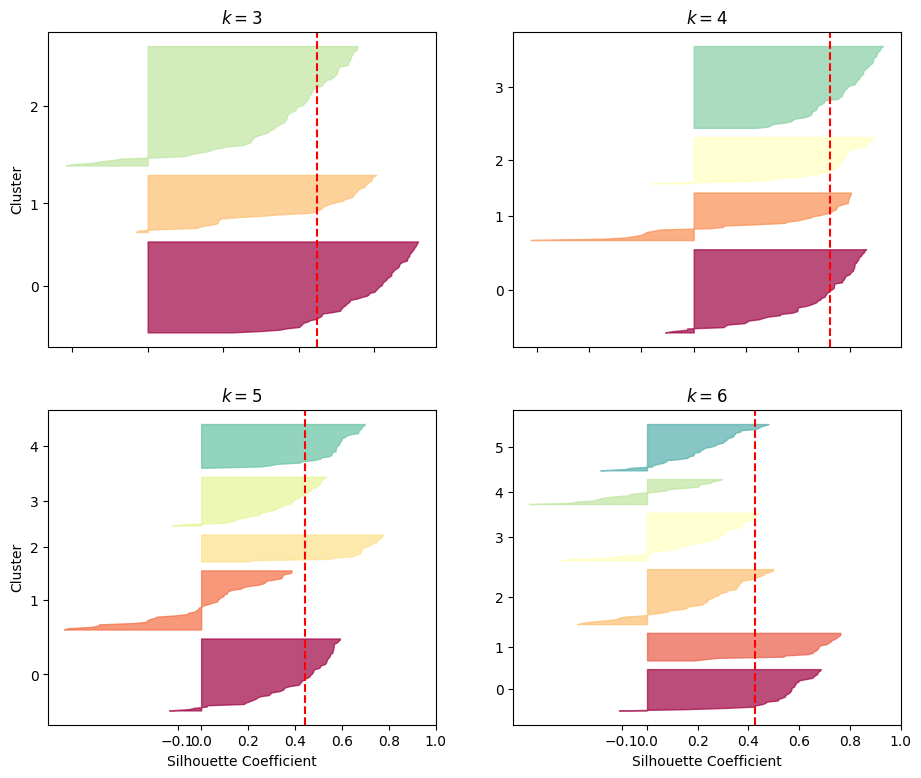

In [1287]:
#Silhouette score to determine best k

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x_pca_reduced, y_pred)

    padding = len(x_pca_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

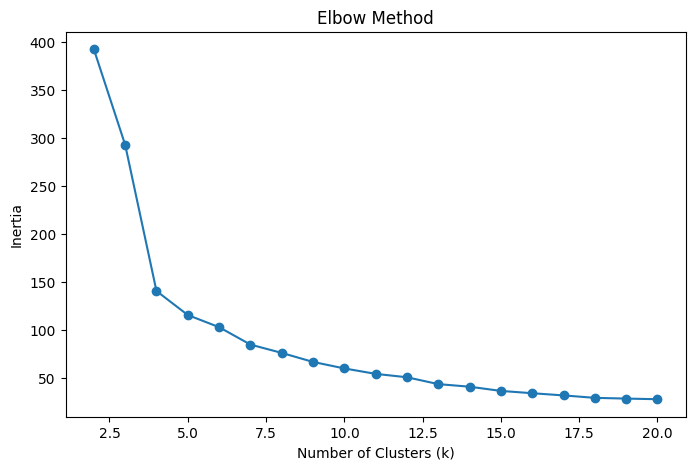

In [1328]:
# k = 2 to 20

inertia=[]
h_range=range(2,21)
for k in h_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_pca_reduced)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(h_range,inertia,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [1289]:
#Applied K-Means clustering

kmeans = KMeans(n_clusters=4,n_init=313,random_state=42)
kmeans_pred = kmeans.fit_predict(Mall_data)

print(kmeans_pred)

[1 1 1 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 0 3 3 3 3
 3 0 3 3 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 3 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


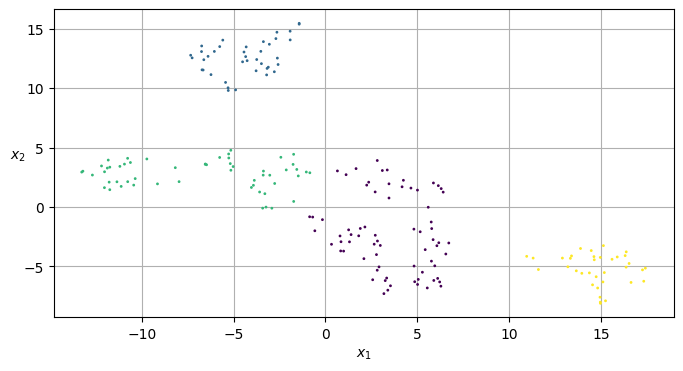

In [1290]:
#2D t-SNE plots after K-Means clustering

kmeans = KMeans(n_clusters=4,n_init=313,random_state=42)
kmeans_tsne = kmeans.fit_predict(TSNE_Mall)

def plot_clusters(TSNE_df, y=kmeans_tsne):
    plt.scatter(TSNE_df['Annual Income (k$)'], TSNE_df['Spending Score (1-100)'], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_df)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

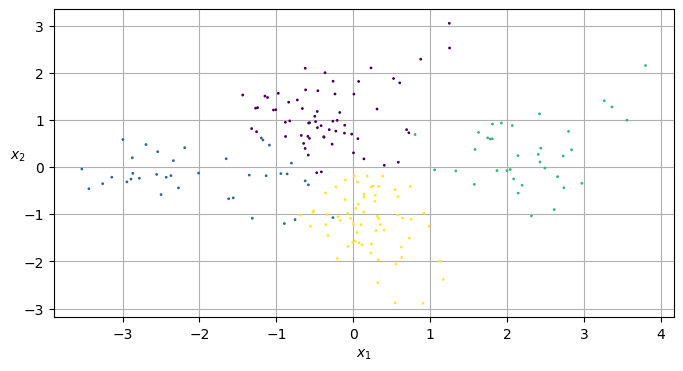

In [1291]:
#PCA plots after K-Means clustering

kmeans = KMeans(n_clusters=4,n_init=313,random_state=42)
kmeans_pca = kmeans.fit_predict(PCA_Mall)

def plot_clusters(x_pca_reduced, y=kmeans_pca):
    plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(x_pca_reduced)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

# **K-Means++ Initialization part**

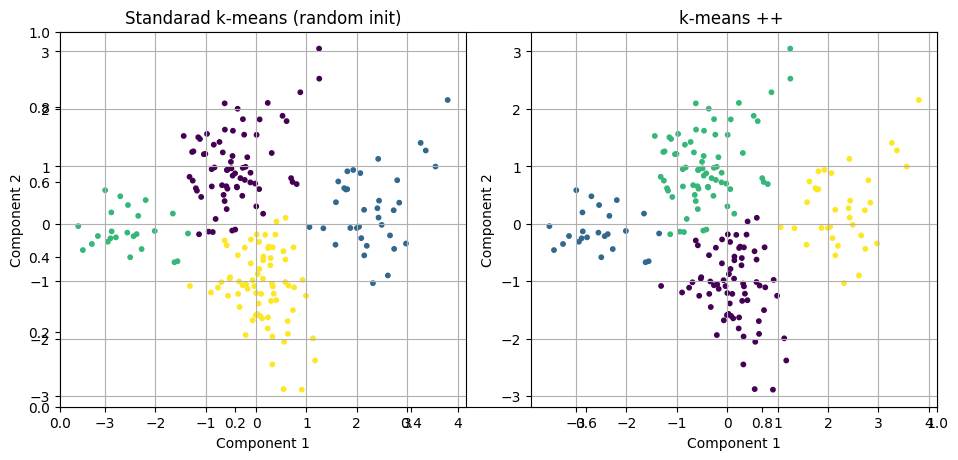

In [1292]:
#Compare standard K-Means and K-Means++

k=4
kmeans_random=KMeans(n_clusters=k,init='random',n_init=1,random_state=1)
kmeans_random.fit(x_pca_reduced)
kmeans_plus=KMeans(n_clusters=k,init='k-means++',n_init=1,random_state=1)
kmeans_plus.fit(x_pca_reduced)

fig,ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_random.labels_, cmap='viridis',s=10)
plt.title('Standarad k-means (random init)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_plus.labels_, cmap='viridis',s=10)
plt.title('k-means ++ ')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.grid()
plt.show()

In [1293]:
#initialization impacts convergence and results

inertias_random=kmeans_random.inertia_
inertias_plus=kmeans_plus.inertia_
sil_random=silhouette_score(x_pca_reduced,kmeans_random.labels_)
sil_plus=silhouette_score(x_pca_reduced,kmeans_plus.labels_)
print('Standarad k-means (random init):')
print('Inertia:',inertias_random)
print('Silhouette Score:',sil_random)
print('K-means++:')
print('Inertia:',inertias_plus)
print('Silhouette Score:',sil_plus)

Standarad k-means (random init):
Inertia: 140.9220498870929
Silhouette Score: 0.5198208316118731
K-means++:
Inertia: 140.9220498870929
Silhouette Score: 0.5198208316118731


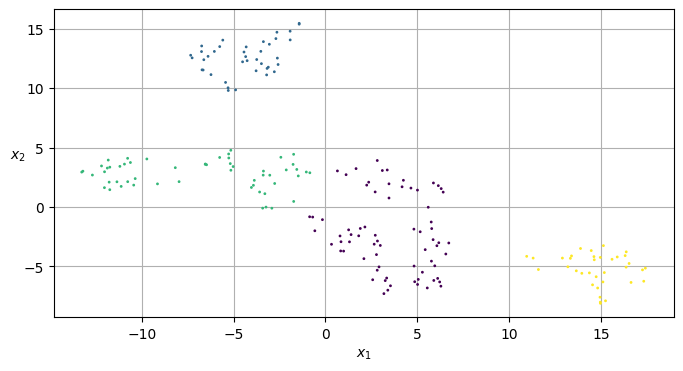

In [1294]:
#2D t-SNE plots after K-Means++

kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans_pred_plus = kmeans.fit_predict(TSNE_Mall)

def plot_clusters(TSNE_df, y=kmeans_pred_plus):
    plt.scatter(TSNE_df['Annual Income (k$)'], TSNE_df['Spending Score (1-100)'], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_df)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

# **Mini-Batch K-Means Part**

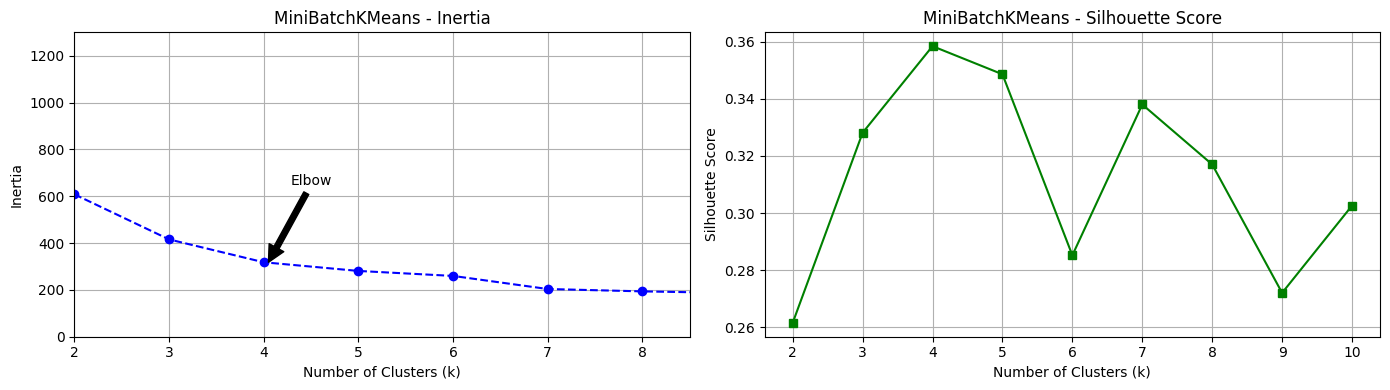

In [1295]:
#plot Inertia ,Elbow and Silhouette score

k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    mini = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10)
    labels = mini.fit_predict(Mall_data)

    inertias.append(mini.inertia_)
    silhouette_scores.append(silhouette_score(Mall_data, labels))

plt.figure(figsize=(14, 4))

# Inertia Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'o--', color='blue')
plt.title("MiniBatchKMeans - Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.5, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([2, 8.5, 0, 1300])
plt.grid(True)

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 's-', color='green')
plt.title("MiniBatchKMeans - Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()


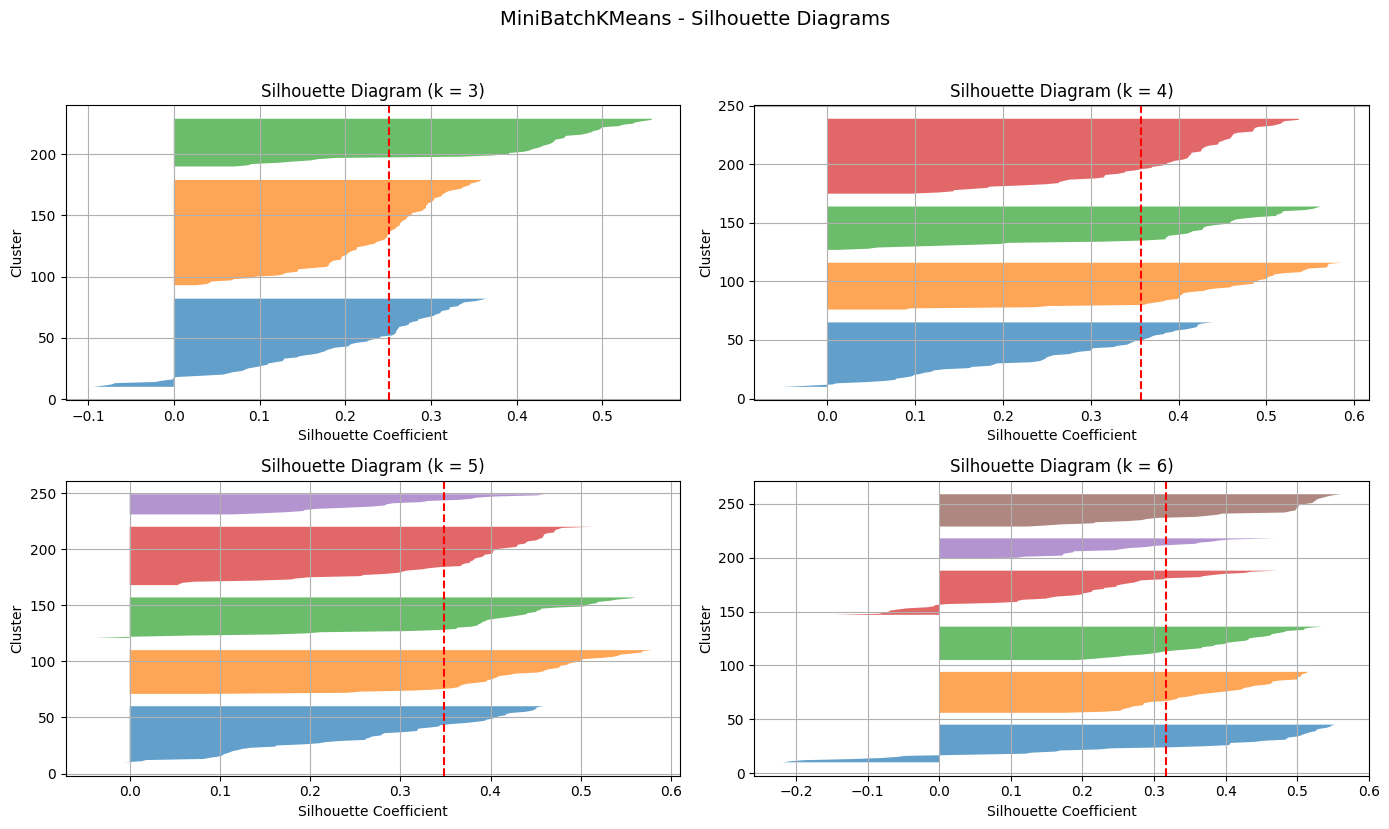

In [1296]:
#Plot Silhouette diagrams for Mini Batch

import matplotlib.cm as cm

k_values = [3, 4, 5, 6]

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for idx, k in enumerate(k_values):

    model = MiniBatchKMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(Mall_data)

    sil_values = silhouette_samples(Mall_data, labels)
    n_clusters = k
    y_lower = 10

    ax = axes[idx // 2][idx % 2]

    for cluster_id in range(n_clusters):
        cluster_sil = sil_values[labels == cluster_id]
        cluster_sil.sort()
        size = cluster_sil.shape[0]
        y_upper = y_lower + size

        color = cm.nipy_spectral(float(cluster_id) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil, alpha=0.7)
        y_lower = y_upper + 10

    ax.axvline(np.mean(sil_values), color='red', linestyle='--')


    ax.set_title(f"Silhouette Diagram (k = {k})")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.grid(True)

plt.suptitle("MiniBatchKMeans - Silhouette Diagrams", fontsize=14, y=1.03)
plt.tight_layout()
plt.show()


In [1297]:
#Applied Mini-Batch clustering

from sklearn.cluster import MiniBatchKMeans

minibatch = MiniBatchKMeans(n_clusters=4,random_state=42)
mimibatch_pred=minibatch.fit_predict(TSNE_Mall)

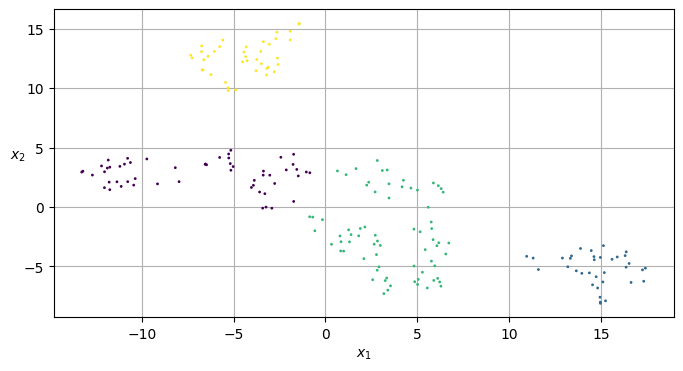

In [1298]:
#2D t-SNE plots after Mini-Batch clustering

minibatch = MiniBatchKMeans(n_clusters=4,random_state=42)
mimibatch_tsne=minibatch.fit_predict(TSNE_Mall)

def plot_clusters(TSNE_Mall, y=mimibatch_tsne):
    plt.scatter(TSNE_Mall[:, 0], TSNE_Mall[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_Mall)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

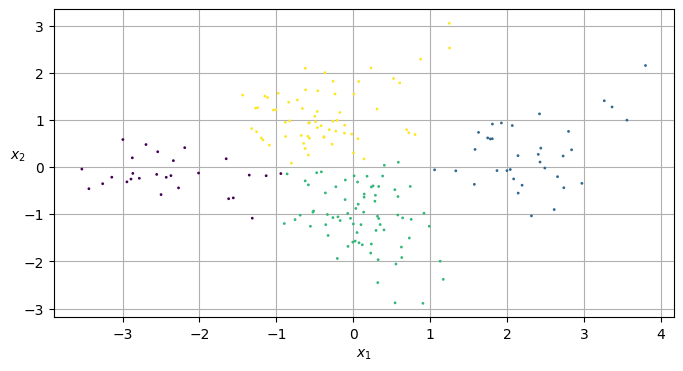

In [1299]:
#PCA plots after Mini-Batch clustering

minibatch = MiniBatchKMeans(n_clusters=4,random_state=42)
mimibatch_pca=minibatch.fit_predict(x_pca_reduced)

def plot_clusters(x_pca_reduced, y=mimibatch_pca):
    plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(x_pca_reduced)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Clustering with k = 20

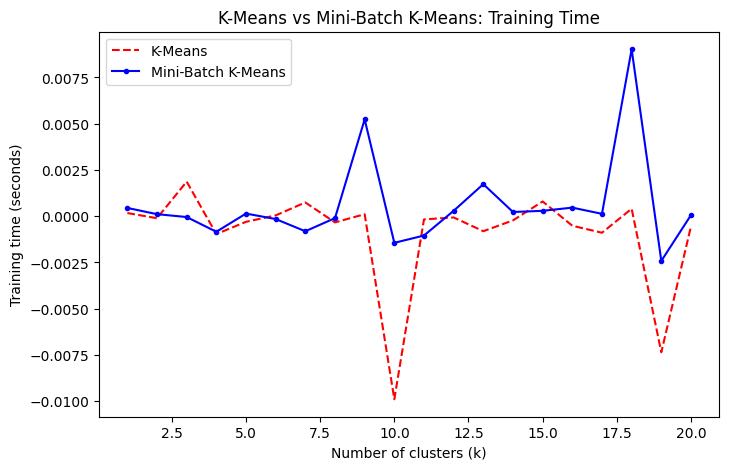

In [1300]:
#Compare speed  Mini-Batch with standard K-Means

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from timeit import timeit

X = Mall_data.values

max_k = 20
times = np.empty((max_k, 2))

for k in range(1, max_k + 1):
    print(f"\rClustering with k = {k}", end="")

    # KMeans
    kmeans = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    start = timeit()
    kmeans.fit(X)
    times[k - 1, 0] = timeit() - start

    # MiniBatchKMeans
    minibatch = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    start = timeit()
    minibatch.fit(X)
    times[k - 1, 1] = timeit() - start

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-Batch K-Means")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Training time (seconds)")
plt.title("K-Means vs Mini-Batch K-Means: Training Time")
plt.legend()
plt.show()

In [1301]:
#Compare memory usage Mini-Batch with standard K-Means

import sys
print('memory usage for Mini-Batch :',sys.getsizeof(mimibatch_pred))
print('memory usage for K-Means :',sys.getsizeof(kmeans_pred))

memory usage for Mini-Batch : 912
memory usage for K-Means : 912


In [1302]:
#Compare accuracy Mini-Batch with standard K-Means

kmeans_sil = silhouette_score(TSNE_Mall, kmeans_pred)
kmeans_inertia = kmeans.inertia_

mini_sil = silhouette_score(TSNE_Mall, mimibatch_pred)
mini_inertia = minibatch.inertia_

print("KMeans:")
print(f"Silhouette Score: {kmeans_sil:.3f}")
print(f"Inertia: {kmeans_inertia:.2f}")

print("\nMiniBatchKMeans:")
print(f"Silhouette Score: {mini_sil:.3f}")
print(f"Inertia: {mini_inertia:.2f}")


KMeans:
Silhouette Score: 0.430
Inertia: 87.52

MiniBatchKMeans:
Silhouette Score: 0.593
Inertia: 97.33


# **DBSCAN Clustering Part**

In [1303]:
#grid search for original data

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


def silhouette_scorer(estimator, Mall_data):
    labels = estimator.fit_predict(Mall_data)
    if len(set(labels)) > 1 and -1 not in set(labels):
        return silhouette_score(Mall_data, labels)
    else:
        return -1

dbscan_grid={'eps': [1.2,3.5,6,8,8.5],
    'min_samples':[15,25,28,30,40]}

dbscanSearch=GridSearchCV(DBSCAN() , dbscan_grid , scoring=silhouette_scorer)

dbscanSearch.fit(Mall_data)
print(dbscanSearch.best_params_)

{'eps': 1.2, 'min_samples': 15}


In [1304]:
#Applied DBSCAN for original data

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=15)
dbscan_label=dbscan.fit(Mall_data)

print(dbscan.labels_)

[-1  0 -1  0  0  0  0  0 -1  0 -1 -1  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  1  0  0  0 -1  0  1  0 -1  0 -1  0  0  0
 -1  0  0  0  0  0  1  0  1  0  1  0  1  0  1  0  0  0 -1  0  1  0  1  0
  1  0  1  0  1  0 -1  0  1  0 -1  0 -1  0  1  0 -1  0 -1  0 -1  0 -1  0
 -1  0 -1 -1 -1 -1 -1 -1]


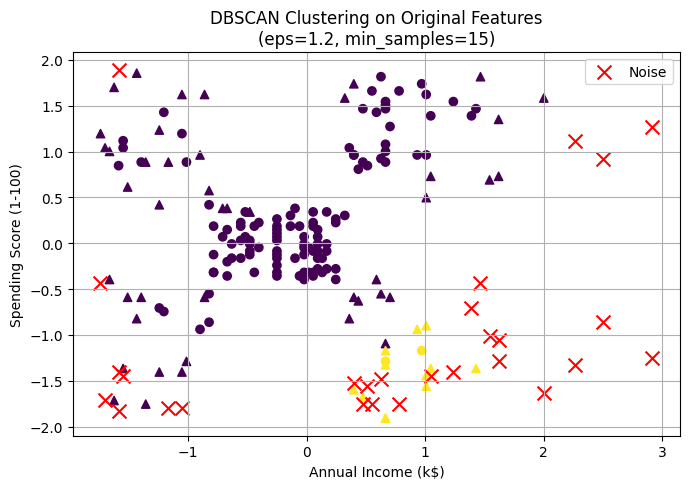

In [1305]:
# plot the original data

import numpy as np
import matplotlib.pyplot as plt

def plot_dbscan_original_space(dbscan, data):

    X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    noise_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | noise_mask)

    cores = X[core_mask]
    non_cores = X[non_core_mask]
    anomalies = X[noise_mask]

    plt.figure(figsize=(7, 5))
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask],  marker='o')

    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask],  marker='^')

    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c='red', marker='x', s=100, label='Noise')

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'DBSCAN Clustering on Original Features\n(eps={dbscan.eps}, min_samples={dbscan.min_samples})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_dbscan_original_space(dbscan, Mall_data)

In [1306]:
noise_point = dbscan.labels_ == -1
core_point = np.zeros_like(labels, dtype=bool)
core_point[dbscan.core_sample_indices_] = True
non_core_mask = ~(core_point | noise_point)

total = len(labels)
noise = np.sum(noise_point)
percent_noise = (noise / total) * 100

print(f"Total points: ",total)
print(f"Noise points: ",noise )
print(f"Percentage of noise:",  percent_noise ,"%" )

Total points:  200
Noise points:  28
Percentage of noise: 14.000000000000002 %


In [1307]:
#grid search for data after T-sne

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


def silhouette_scorer(estimator, TSNE_Mall):
    labels = estimator.fit_predict(TSNE_Mall)
    if len(set(labels)) > 1 and -1 not in set(labels):
        return silhouette_score(TSNE_Mall, labels)
    else:
        return -1

dbscan_grid={'eps': [3.5,6,8,8.5],
    'min_samples':[25,28,30,40]}

dbscanSearch=GridSearchCV(DBSCAN() , dbscan_grid , scoring=silhouette_scorer)

dbscanSearch.fit(TSNE_Mall)
print(dbscanSearch.best_params_)

{'eps': 3.5, 'min_samples': 25}


In [1308]:
#Applied DBSCAN for data after T-sne

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.5, min_samples=25)
dbscan_label=dbscan.fit(TSNE_Mall)

print(dbscan.labels_)

[ 0  2  1  2  0  2  1  2  1  2  1 -1  1  2  1  2  0  2  1 -1  0  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  0  1  2  1  0
  0  0  1  0  0  1  1  1  1  1  0  1  1  0  1  1  1  0  1  1  0  0  1  1
  1  1  1  0  1  1  0  1  1  1  1  1  0  1  1  0  0  1  1  0  1  1  0  0
  1  0  1  0  0  1  1  0  1  0  1  1  1  1  1  0  0  0  0  0  1  1  1  1
  0  0  1  3  0  3  4  3  4  3  4  3  0  3  4  3  4  3  4  3  4  3  0  3
  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3
  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3  4  3
  4  3  4  3  4  3  4  3]


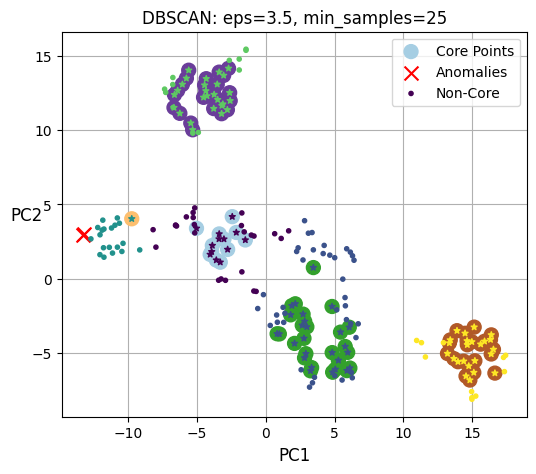

In [1309]:
#2D t-SNE plots after DBSCAN clustering

def plot_dbscan(dbscan, x_pca_reduced, size=100, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = x_pca_reduced[anomalies_mask]
    non_cores = x_pca_reduced[non_core_mask]

    plt.figure(figsize=(6, 5))
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired", label="Core Points")
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='*', s=20)
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, label="Anomalies")
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".", label="Non-Core")

    if show_xlabels:
        plt.xlabel("PC1", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("PC2", fontsize=12, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title(f"DBSCAN: eps={dbscan.eps}, min_samples={dbscan.min_samples}")
    plt.legend()
    plt.grid(True)
    plt.gca().set_axisbelow(True)
    plt.show()

plot_dbscan(dbscan, TSNE_Mall, size=100)

In [1310]:
#grid search for data after PCA

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


def silhouette_scorer(estimator, x_pca_reduced):
    labels = estimator.fit_predict(x_pca_reduced)
    if len(set(labels)) > 1 and -1 not in set(labels):
        return silhouette_score(x_pca_reduced, labels)
    else:
        return -1

dbscan_grid={'eps': [0.9,2,3.5,4,4.5,5,6],
    'min_samples':[20,25,28,30,40]}

dbscanSearch=GridSearchCV(DBSCAN() , dbscan_grid , scoring=silhouette_scorer)

dbscanSearch.fit(x_pca_reduced)
print(dbscanSearch.best_params_)

{'eps': 0.9, 'min_samples': 20}


In [1311]:
#Applied DBSCAN after PCA

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=20)
dbscan_label=dbscan.fit(x_pca_reduced)

print(dbscan.labels_)

[ 0  1  0  1  0  1  0  1 -1  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  0  0  1  0  1  0  1  0  1  0  0  0  1  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  2  0  2  0  0  0  2  0  2  0  2  0  2  0  0  0
  2  0  0  0  2  0  2  0  2  0  2  0  2  0  2  0  0  0  2  0  2  0  2  0
  2  0  2  0  2  0  2  0  2  0  2  0  2  0  2  0  2  0  2  0  2  0  2  0
 -1  0 -1 -1 -1 -1 -1 -1]


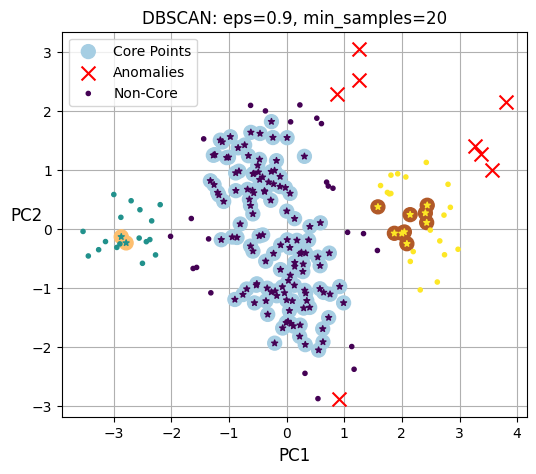

In [1312]:
#PCA plots after DBSACN clustering

def plot_dbscan(dbscan, x_pca_reduced, size=100, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = x_pca_reduced[anomalies_mask]
    non_cores = x_pca_reduced[non_core_mask]

    plt.figure(figsize=(6, 5))
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired", label="Core Points")
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='*', s=20)
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, label="Anomalies")
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".", label="Non-Core")

    if show_xlabels:
        plt.xlabel("PC1", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("PC2", fontsize=12, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title(f"DBSCAN: eps={dbscan.eps}, min_samples={dbscan.min_samples}")
    plt.legend()
    plt.grid(True)
    plt.gca().set_axisbelow(True)
    plt.show()

plot_dbscan(dbscan, x_pca_reduced, size=100)


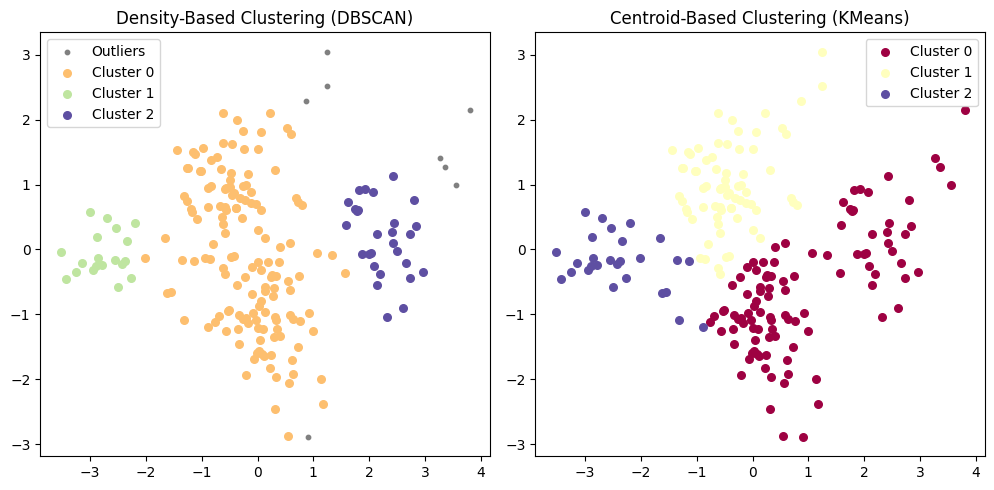

In [1313]:
#Plot DBSCAN and compare to K-Means clusters

dbscan=DBSCAN(eps=0.9,min_samples=20)
db_labels=dbscan.fit_predict(x_pca_reduced)

km_model=KMeans(n_clusters=3,random_state=42)
km_labels=km_model.fit_predict(x_pca_reduced)

plt.figure(figsize=(15,5))
plt.subplot(131)

db_unique=np.unique(db_labels)
color_map_db=plt.cm.Spectral(np.linspace(0, 1, len(db_unique)))
for group, shade in zip(db_unique, color_map_db):
  mask = (db_labels == group)
  if group == -1:
        plt.scatter(x_pca_reduced[mask][:, 0], x_pca_reduced[mask][:, 1], color='gray', s=10, label='Outliers')
  else:
        plt.scatter(x_pca_reduced[mask][:, 0], x_pca_reduced[mask][:, 1], color=shade, s=30, label=f'Cluster {group}')

plt.title('Density-Based Clustering (DBSCAN)')
plt.legend()

# KMeans results
plt.subplot(132)
km_unique = np.unique(km_labels)
color_map_km = plt.cm.Spectral(np.linspace(0, 1, len(km_unique)))

for group, shade in zip(km_unique, color_map_km):
    plt.scatter(x_pca_reduced[km_labels == group][:, 0], x_pca_reduced[km_labels == group][:, 1], color=shade, s=30, label=f'Cluster {group}')

plt.title('Centroid-Based Clustering (KMeans)')
plt.legend()

plt.tight_layout()
plt.show()

# **Compare clustering performance with and without dimensionality reduction (PCA) and Compare clustering in full space vs. reduced 2D space**

In [1314]:
#Kmeans clustering

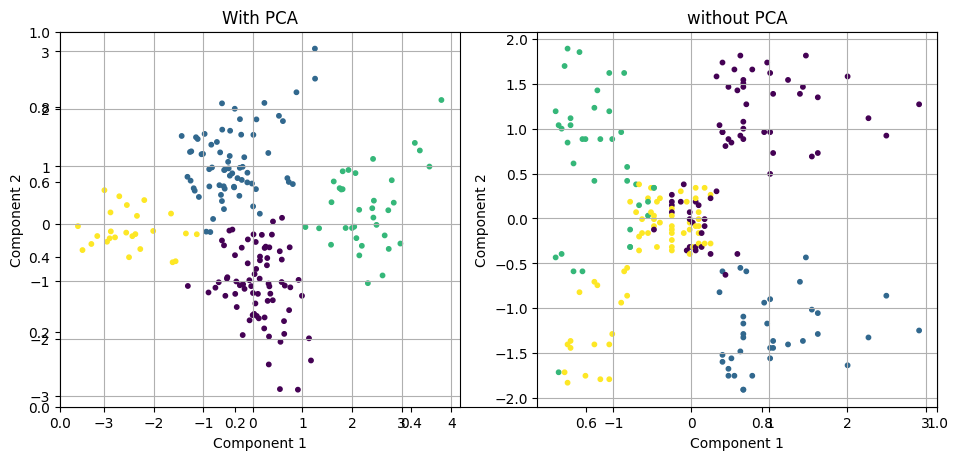

In [1315]:
#Compare Kmeans clustering with and without PCA

kmeans_PCA=KMeans(n_clusters=4,init='random',n_init=313,random_state=42)
kmeans_PCA.fit(x_pca_reduced)

kmeans_orig=KMeans(n_clusters=4,init='random',n_init=313,random_state=42)
kmeans_orig.fit(Mall_data)

fig,ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_PCA.labels_, cmap='viridis',s=10)
plt.title('With PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Mall_data['Annual Income (k$)'], Mall_data['Spending Score (1-100)'], c=kmeans_orig.labels_, cmap='viridis',s=10)
plt.title('without PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.grid()
plt.show()

In [1316]:
#Compare Kmaeans in full space vs. reduced 2D space

kmeans=KMeans(n_clusters=4,random_state=42)
kmeans_full=kmeans.fit_predict(Mall_data)

kmeans=KMeans(n_clusters=3,random_state=42)
kmeans_reduc=kmeans.fit_predict(x_pca_reduced)
kmeans_full_score=silhouette_score(Mall_data,kmeans_full)
kmeans_reduc_score=silhouette_score(x_pca_reduced,kmeans_reduc)
print(f"Silhouette Score (original data): {kmeans_full_score:}")
print(f"Silhouette Score (PCA-reduced data): {kmeans_reduc_score:}")

Silhouette Score (original data): 0.3572699112009899
Silhouette Score (PCA-reduced data): 0.3979442781642101


In [1317]:
#Kmeans++

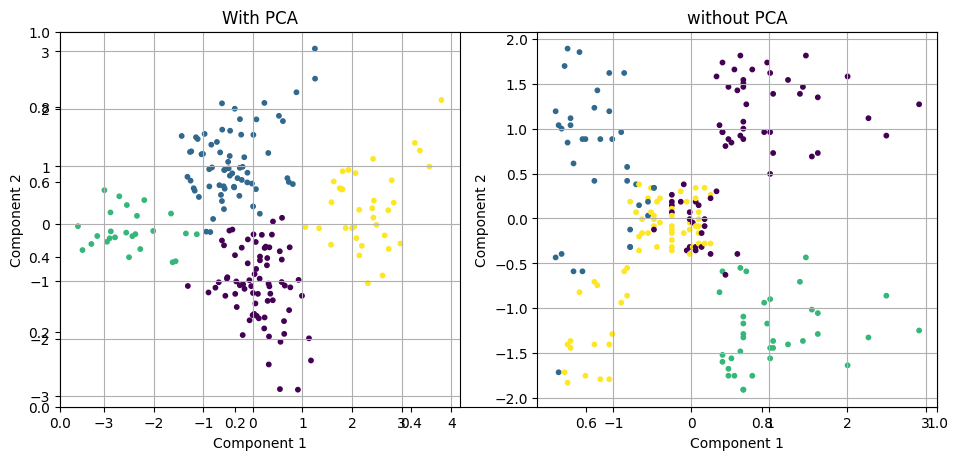

In [1318]:
#Compare Kmeans clustering with and without PCA

kmeansplus_PCA=KMeans(n_clusters=4,init='k-means++',n_init=313,random_state=42)
kmeansplus_PCA.fit(x_pca_reduced)

kmeansplus_orig=KMeans(n_clusters=4,init='k-means++',n_init=313,random_state=42)
kmeansplus_orig.fit(Mall_data)

fig,ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeansplus_PCA.labels_, cmap='viridis',s=10)
plt.title('With PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Mall_data['Annual Income (k$)'], Mall_data['Spending Score (1-100)'], c=kmeansplus_orig.labels_, cmap='viridis',s=10)
plt.title('without PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.grid()
plt.show()

In [1319]:
#Compare Kmeans++ in full space vs. reduced 2D space

kmeans_plus=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_plus_full=kmeans_plus.fit_predict(Mall_data)

kmeans_plus_red=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans_plus_reduc=kmeans_plus_red.fit_predict(x_pca_reduced)


kmeans_plus_full_score=silhouette_score(Mall_data,kmeans_plus_full)
kmeans_plus_reduc_score=silhouette_score(x_pca_reduced,kmeans_plus_reduc)
print(f"Silhouette Score (original data): {kmeans_plus_full_score:}")
print(f"Silhouette Score (PCA-reduced data): {kmeans_plus_reduc_score:}")

Silhouette Score (original data): 0.3572699112009899
Silhouette Score (PCA-reduced data): 0.3979442781642101


In [1320]:
#MiniBatch

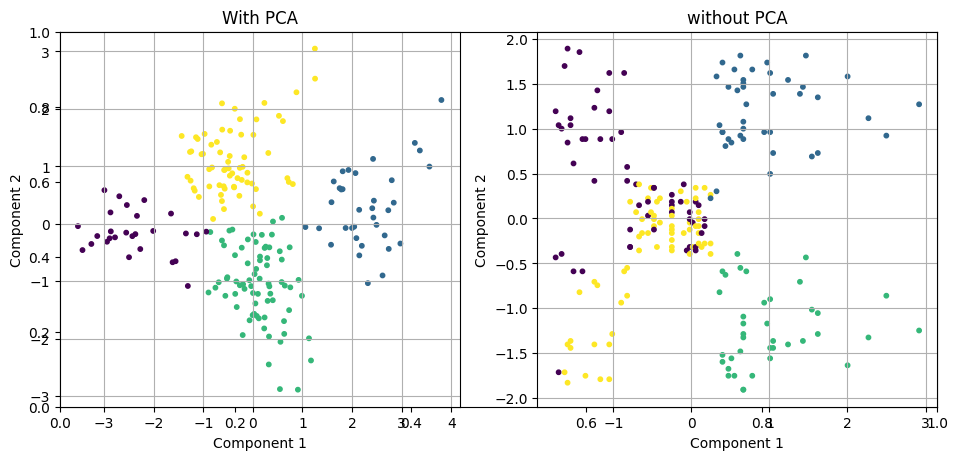

In [1321]:
#Compare Mini Batch clustering with and without PCA

mini_PCA=MiniBatchKMeans(n_clusters=4,random_state=42)
mini_PCA.fit(x_pca_reduced)

mini_orig=MiniBatchKMeans(n_clusters=4,random_state=42)
mini_orig.fit(Mall_data)

fig,ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=mini_PCA.labels_, cmap='viridis',s=10)
plt.title('With PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Mall_data['Annual Income (k$)'], Mall_data['Spending Score (1-100)'], c=mini_orig.labels_, cmap='viridis',s=10)
plt.title('without PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.grid()
plt.show()

In [1322]:
#Compare MiniBatch in full space vs. reduced 2D space

mini_full=MiniBatchKMeans(n_clusters=4,random_state=42)
mini_full_pred=mini_full.fit_predict(Mall_data)

mini_reduc=MiniBatchKMeans(n_clusters=4,random_state=42)
mini_reduc_pred=mini_reduc.fit_predict(x_pca_reduced)

mini_full_score=silhouette_score(Mall_data,mini_full_pred)
mini_reduc_score=silhouette_score(x_pca_reduced,mini_reduc_pred)
print(f"Silhouette Score (original data): {mini_full_score:}")
print(f"Silhouette Score (PCA-reduced data): {mini_reduc_score:}")

Silhouette Score (original data): 0.35780100806074233
Silhouette Score (PCA-reduced data): 0.5200972619274145


In [1323]:
#DBSCAN

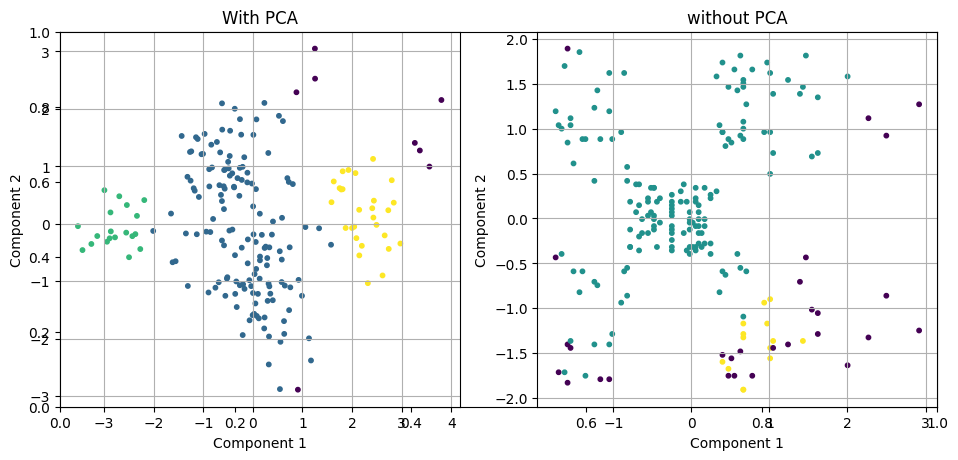

In [1324]:
#Compare DBSCAN clustering with and without PCA

dbscan_PCA=DBSCAN(eps=0.9, min_samples=20)
dbscan_PCA.fit(x_pca_reduced)

dbscan_orig=DBSCAN(eps=1.2, min_samples=15)
dbscan_orig.fit(Mall_data)

fig,ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=dbscan_PCA.labels_, cmap='viridis',s=10)
plt.title('With PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Mall_data['Annual Income (k$)'], Mall_data['Spending Score (1-100)'], c=dbscan_orig.labels_, cmap='viridis',s=10)
plt.title('without PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.grid()
plt.show()

In [1325]:
#Compare DBSCAN in full space vs. reduced 2D space

dbscan_full = DBSCAN(eps=1.2, min_samples=15)
dbscan_full_pred = dbscan_full.fit_predict(Mall_data)

dbscan_reduc = DBSCAN(eps=0.9, min_samples=20)
dbscan_reduc_pred = dbscan_reduc.fit_predict(x_pca_reduced)

dbscan_full_score = silhouette_score(Mall_data, dbscan_full_pred)
dbscan_reduc_score = silhouette_score(x_pca_reduced, dbscan_reduc_pred)

print(f"Silhouette Score (original data): {dbscan_full_score:}")
print(f"Silhouette Score (PCA-reduced data): {dbscan_reduc_score:}")

Silhouette Score (original data): 0.20195915272768356
Silhouette Score (PCA-reduced data): 0.35620146839257344


# **Create a comparison table summarizing**

In [1326]:
import time

results = []


start = time.time()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(Mall_data)
kmeans_time = time.time() - start
kmeans_inertia = kmeans.inertia_
kmeans_sil = silhouette_score(Mall_data, kmeans_labels)
results.append(['KMeans', kmeans_inertia, kmeans_sil, kmeans_time, len(set(kmeans_labels))])


start = time.time()
mini = MiniBatchKMeans(n_clusters=4, random_state=42)
mini_labels = mini.fit_predict(Mall_data)
mini_time = time.time() - start
mini_inertia = mini.inertia_
mini_sil = silhouette_score(Mall_data, mini_labels)
results.append(['MiniBatchKMeans', mini_inertia, mini_sil, mini_time, len(set(mini_labels))])


start = time.time()
dbscan = DBSCAN(eps=1.2, min_samples=15)
dbscan_labels = dbscan.fit_predict(Mall_data)
dbscan_time = time.time() - start


if len(set(dbscan_labels))>1 and -1 in dbscan_labels:
  dbscan1_sil=silhouette_score(scaled_df,dbscan_labels)
else:
  dbscan1_sil=-1

results.append(['DBSCAN', np.nan, dbscan1_sil, dbscan_time, len(set(dbscan_labels))])

columns=['Algorithm','Inertia','Silhouette Score','Time','Number of Clusters']
result_df=pd.DataFrame(results,columns=columns)
print(result_df)



         Algorithm     Inertia  Silhouette Score      Time  Number of Clusters
0           KMeans  314.119541          0.357270  0.006011                   4
1  MiniBatchKMeans  318.018891          0.357801  0.015327                   4
2           DBSCAN         NaN          0.215794  0.005600                   3


How scaling (StandardScaler) affects clustering ?

StandardScaler ensures all features contribute equally to distance calculations (improving clustering quality) and Without scaling large-value features dominate and distort the clusters

How random seed affects results (especially for t-SNE and KMeans) ?

Setting random state in KMeans and t-SNE ensures consistent and repeatable results every time run the model and Without random_state clustering results and visualizations may vary making analysis unreliable